In [2]:
import pandas as pd ## pandas for reading data in dataframe
import matplotlib.pyplot as plt ## pyplot for visualizations
import seaborn as sns ## seaborn for visualizations
import plotly.express as ex ## plotly express for visualizations
import missingno as msno ## missingno for nulls

### 📌 Initial Investigation

In [3]:
data = pd.read_csv("raw_data.csv") # reading data 
data.head() # display first 5 rows

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


In [4]:
## basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [5]:
## describe numerical data
data.describe()

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,43.732024,49.904973,2.996516,2.704783
std,12.661095,8.897699,1.163307,1.188887
min,22.000000,35.000000,1.000000,1.000000
25%,33.000000,42.000000,2.000000,2.000000
50%,44.000000,50.000000,3.000000,3.000000
75%,55.000000,57.000000,4.000000,4.000000
max,65.000000,65.000000,5.000000,5.000000


In [6]:
## describe non_numerical data
data.describe(include = 'object')

,Survey_Date,Gender,Region,Industry,Job_Role,Work_Arrangement,Mental_Health_Status,Burnout_Level,Physical_Health_Issues,Salary_Range
count,3157,3157,3157,3157,3157,3157,2358,3157,2877,3157
unique,26,4,6,9,24,3,6,3,31,5
top,2025-06-07,Male,South America,Professional Services,Research Scientist,Onsite,PTSD,Medium,Shoulder Pain; Eye Strain,$60K-80K
freq,137,1535,575,730,151,1562,423,1366,262,1014


In [7]:
## columns with null issues
missing_values = data.isna().sum() #number of missing values
## percentage of missing values
missing_percentsge = ((data.isna().sum() / len(data)) * 100).round().astype(str) + '%'

## columns names with missing values and missing percentage
result = pd.DataFrame(
    {'missing': missing_values.values,
     'percentage' : missing_percentsge})

result

,missing,percentage
Survey_Date,0,0.0%
Age,0,0.0%
Gender,0,0.0%
Region,0,0.0%
Industry,0,0.0%
Job_Role,0,0.0%
Work_Arrangement,0,0.0%
Hours_Per_Week,0,0.0%
Mental_Health_Status,799,25.0%
Burnout_Level,0,0.0%


<Axes: >

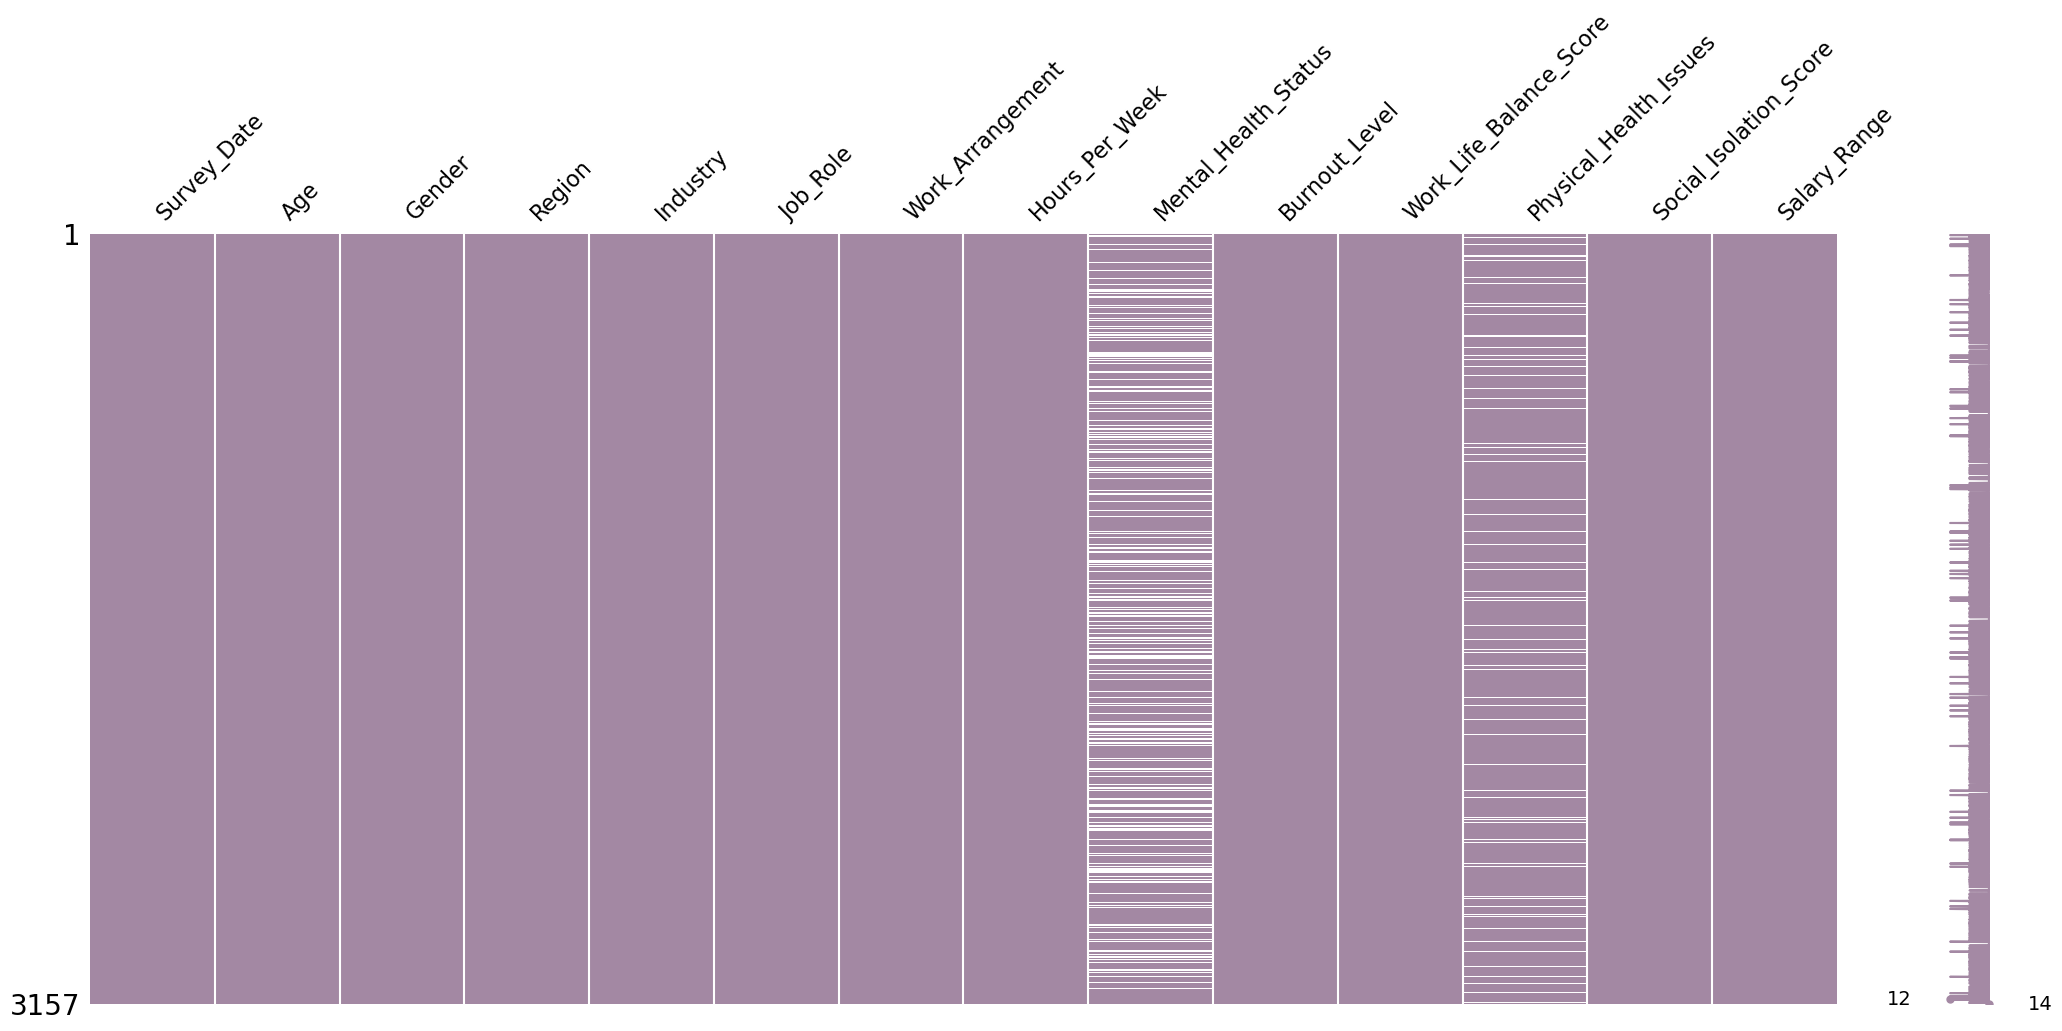

In [8]:
# matrix for null values
msno.matrix(data,
            color = (0.643, 0.537, 0.643))

<Axes: >

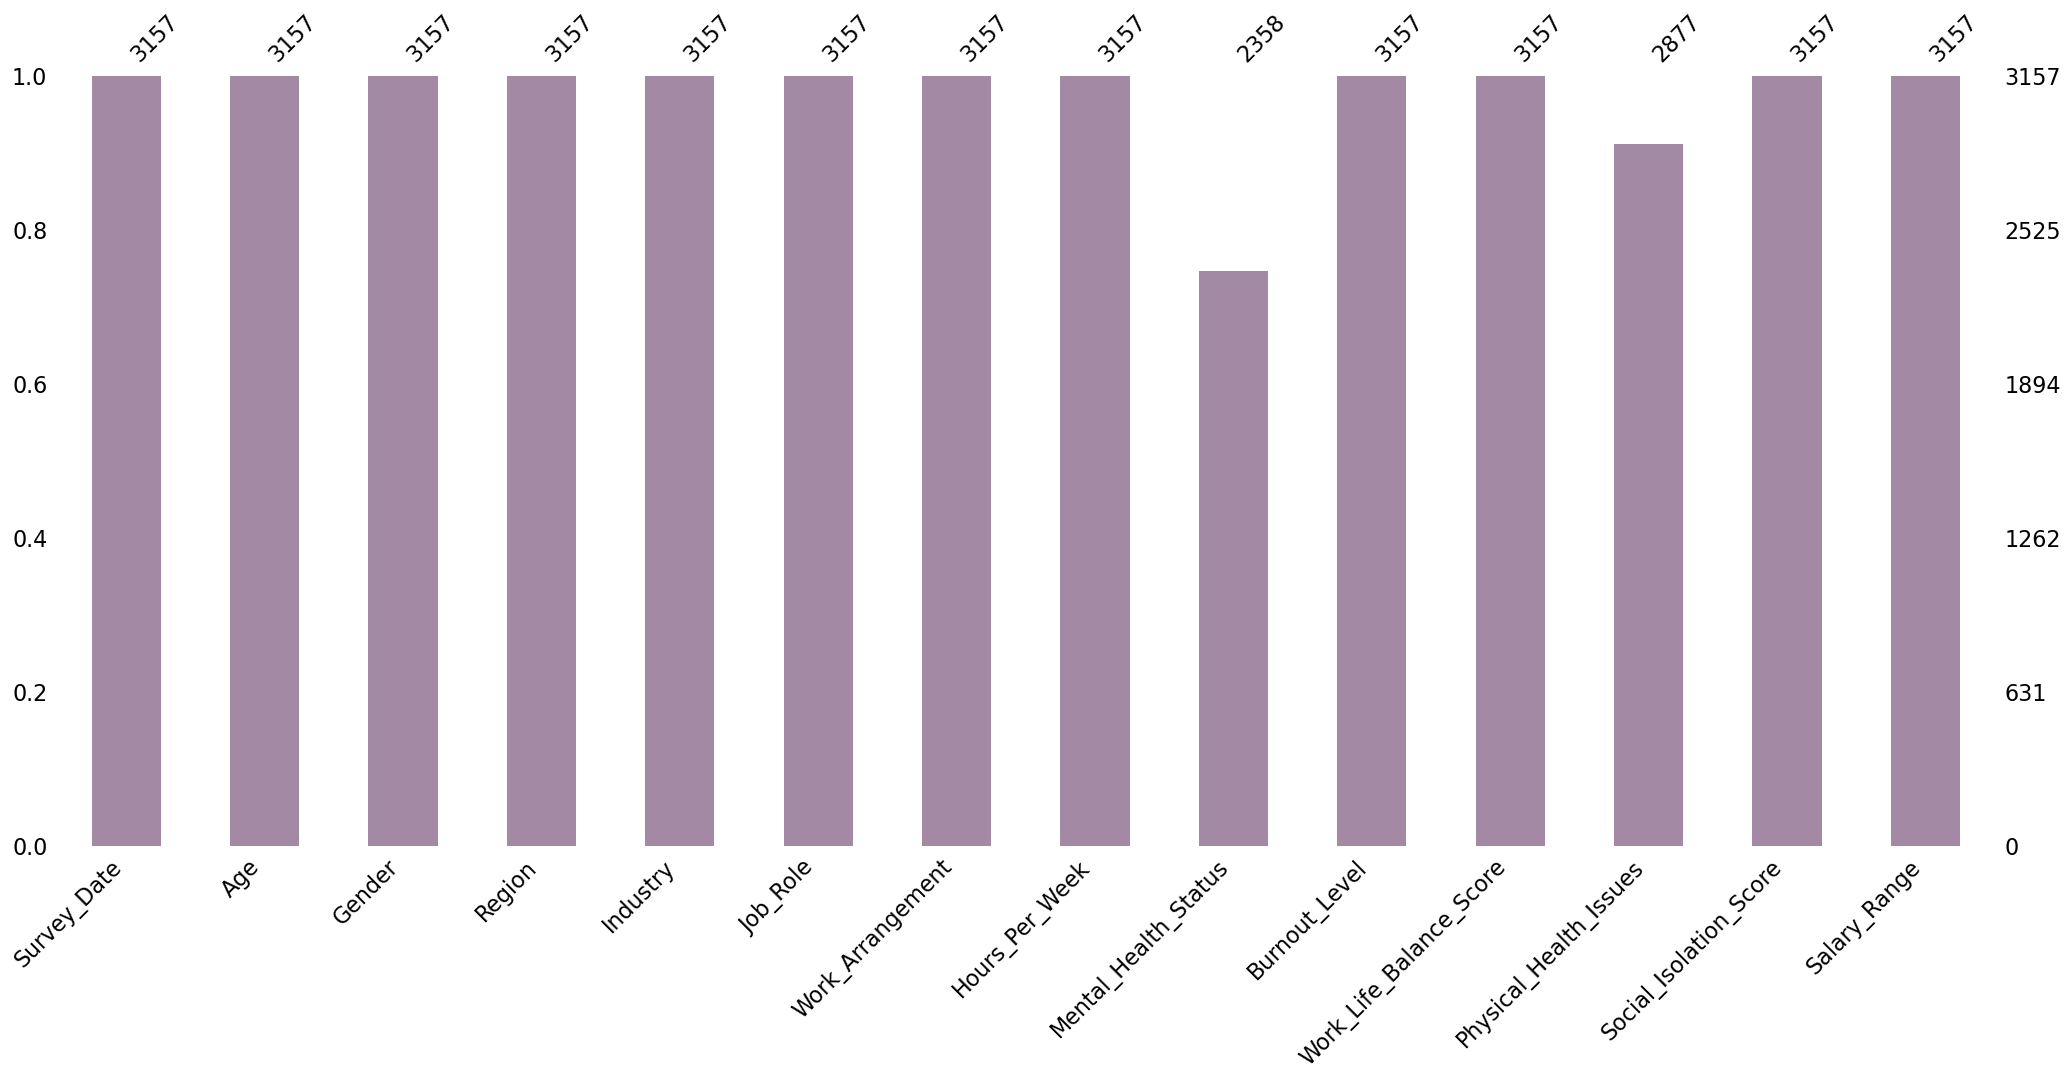

In [9]:
## missing values
msno.bar(data,
         color = "#A489A4")


In [10]:
## check duplicates in data
data.duplicated().sum()

0

In [11]:
## check data types of each column
data.dtypes

Survey_Date                object
Age                         int64
Gender                     object
Region                     object
Industry                   object
Job_Role                   object
Work_Arrangement           object
Hours_Per_Week              int64
Mental_Health_Status       object
Burnout_Level              object
Work_Life_Balance_Score     int64
Physical_Health_Issues     object
Social_Isolation_Score      int64
Salary_Range               object
dtype: object

In [12]:
## histogram for gender distribution
age_fig = ex.histogram(data,
            x = 'Gender',
            nbins = 30,
            color_discrete_sequence = ["#A489A4"])

## figure title and labels
age_fig.update_layout(
    title = 'Gender',
    xaxis_title = 'Gender',
    yaxis_title = None,
    template = 'simple_white')

In [13]:
## histogram for region distribution
age_fig = ex.histogram(data,
            x = 'Region',
            nbins = 30,
            color_discrete_sequence = ["#A489A4"])

## figure title and labels
age_fig.update_layout(
    title = 'Region',
    xaxis_title = 'Region',
    yaxis_title = None,
    template = 'simple_white')

In [14]:
## histogram for Industry distribution
age_fig = ex.histogram(data,
            x = 'Industry',
            nbins = 30,
            color_discrete_sequence = ["#A489A4"])

## figure title and labels
age_fig.update_layout(
    title = 'Industry',
    xaxis_title = 'Industry',
    yaxis_title = None,
    template = 'simple_white')

In [15]:
## histogram for Job_Role distribution
age_fig = ex.histogram(data,
            x = 'Job_Role',
            nbins = 30,
            color_discrete_sequence = ["#A489A4"])

## figure title and labels
age_fig.update_layout(
    title = 'Job_Role',
    xaxis_title = 'Job_Role',
    yaxis_title = None,
    template = 'simple_white')

In [16]:
## histogram for Work_Arrangement distribution
age_fig = ex.histogram(data,
            x = 'Work_Arrangement',
            nbins = 30,
            color_discrete_sequence = ["#A489A4"])

## figure title and labels
age_fig.update_layout(
    title = 'Work_Arrangement',
    xaxis_title = 'Work_Arrangement',
    yaxis_title = None,
    template = 'simple_white')

In [17]:
## histogram for Mental_Health_Status distribution
age_fig = ex.histogram(data,
            x = 'Mental_Health_Status',
            nbins = 30,
            color_discrete_sequence = ["#A489A4"])

## figure title and labels
age_fig.update_layout(
    title = 'Mental_Health_Status',
    xaxis_title = 'Mental_Health_Status',
    yaxis_title = None,
    template = 'simple_white')

In [18]:
## histogram for Burnout_Level distribution
age_fig = ex.histogram(data,
            x = 'Burnout_Level',
            nbins = 30,
            color_discrete_sequence = ["#A489A4"])

## figure title and labels
age_fig.update_layout(
    title = 'Burnout_Level',
    xaxis_title = 'Burnout_Level',
    yaxis_title = None,
    template = 'simple_white')

In [19]:
## histogram for Work_Life_Balance_Score distribution
age_fig = ex.histogram(data,
            x = 'Work_Life_Balance_Score',
            nbins = 20,
            color_discrete_sequence = ["#A489A4"])

## figure title and labels
age_fig.update_layout(
    title = 'Work_Life_Balance_Score',
    xaxis_title = 'Work_Life_Balance_Score',
    yaxis_title = None,
    template = 'simple_white')

In [20]:
## histogram for Social_Isolation_Score distribution
age_fig = ex.histogram(data,
            x = 'Social_Isolation_Score',
            nbins = 20,
            color_discrete_sequence = ["#A489A4"])

## figure title and labels
age_fig.update_layout(
    title = 'Social_Isolation_Score',
    xaxis_title = 'Social_Isolation_Score',
    yaxis_title = None,
    template = 'simple_white')

In [21]:
## histogram for age distribution
age_fig = ex.histogram(data,
            x = 'Age',
            nbins = 30,
            color_discrete_sequence = ["#A489A4"])

## figure title and labels
age_fig.update_layout(
    title = 'Age Distribution',
    xaxis_title = 'Age',
    yaxis_title = None,
    template = 'simple_white')

In [22]:
## histogram for hours_per_week distribution
work_hours_fig = ex.histogram(data,
                            x = 'Hours_Per_Week',
                            nbins = 30,
                            color_discrete_sequence = ["#A489A4"])

## figure title and labels
work_hours_fig.update_layout(
    title = 'Work Hours Distribution',
    xaxis_title = 'Hours Per Week',
    yaxis_title = None,
    template = 'simple_white')

In [23]:
## histogram for Salary_Range distribution
work_hours_fig = ex.histogram(data,
                            x = 'Salary_Range',
                            nbins = 30,
                            color_discrete_sequence = ["#A489A4"])

## figure title and labels
work_hours_fig.update_layout(
    title = 'Salary Range Distribution',
    xaxis_title = 'Salary_Range',
    yaxis_title = None,
    template = 'simple_white')

In [24]:
## physical health issues unique values
data['Physical_Health_Issues'].unique()

array(['Shoulder Pain; Neck Pain', 'Back Pain',
       'Shoulder Pain; Eye Strain', nan, 'Back Pain; Shoulder Pain',
       'Back Pain; Shoulder Pain; Wrist Pain', 'Neck Pain',
       'Shoulder Pain', 'Eye Strain; Wrist Pain', 'Back Pain; Eye Strain',
       'Back Pain; Shoulder Pain; Eye Strain', 'Back Pain; Wrist Pain',
       'Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain', 'Eye Strain',
       'Back Pain; Shoulder Pain; Eye Strain; Neck Pain',
       'Eye Strain; Neck Pain', 'Shoulder Pain; Eye Strain; Wrist Pain',
       'Back Pain; Neck Pain', 'Wrist Pain',
       'Back Pain; Shoulder Pain; Neck Pain',
       'Back Pain; Eye Strain; Neck Pain',
       'Back Pain; Shoulder Pain; Eye Strain; Wrist Pain',
       'Shoulder Pain; Eye Strain; Neck Pain', 'Neck Pain; Wrist Pain',
       'Back Pain; Eye Strain; Neck Pain; Wrist Pain',
       'Back Pain; Eye Strain; Wrist Pain',
       'Back Pain; Neck Pain; Wrist Pain', 'Shoulder Pain; Wrist Pain',
       'Back Pain; Shoulder Pain; Ey

In [25]:
## boxplot figure to display outliers in Age Column
age_fig = ex.box(data_frame = data,
                y = 'Age',
                color_discrete_sequence = ['#A489A4'])

## update titles of the figure
age_fig.update_layout(title = "Age Outliers",
                      xaxis_title = None,
                      yaxis_title = 'Age',
                      template = 'simple_white')                 

In [26]:
## boxplot figure to display outliers in Hours_Per_Week Column
age_fig = ex.box(data_frame = data,
                y = 'Hours_Per_Week',
                color_discrete_sequence = ['#A489A4'])

## update titles of the figure
age_fig.update_layout(title = "Hours_Per_Week Outliers",
                      xaxis_title = None,
                      yaxis_title = 'Hours_Per_Week',
                      template = 'simple_white')          

### 📌 Initial Investigation

#### Data Overview
- **Rows :** 3157.
- **Columns :**  14. 
- **Description :** 
This dataset focuses on mental health among working individuals across different industries and regions.
The goal is to analyze the factors affecting employees’ mental health and identify potential patterns or issues that could help organizations improve workplace environments and provide better mental health support.

---

#### Data Quality Issues
- **Missing Values** : 
    - **Mental_Health_Status** Column has 25% Null Values.
    - **Physical_Health_Issues** Column has 9% Null Values.
- **Duplicates** : There Is No Duplicates In This Data. 
- **Data Type** : **Survey_date** Column is defined as object and it should be Date Type

---

#### Columns Description
| Column Name                    | Description                                                              |
| ------------------------------ | ------------------------------------------------------------------------ |
| **Survey_Date**                | The date when the survey was conducted.                                  |
| **Age**                        | Age of the respondent.                                                   |
| **Gender**                     | Gender identity of the respondent (Female ,Male ,Non-binary ,Prefer not to say).                                                                                                       |
| **Region**                     | Geographic region where the respondent is located (Asia, Africa, Europe, South America, Oceania, North America).                                                                           |
| **Industry**                   | The industry in which the respondent works (Professional Services, Education, Manufacturing, Customer Service, Technology, Finance, Retail, Healthcare, Marketing).                       |
| **Job_Role**                   | The specific job role or position of the respondent.                     |
| **Work_Arrangement**           | Type of work arrangement (e.g., Remote, Hybrid, Onsite).                 |
| **Hours_Per_Week**             | Number of working hours per week.                                        |
| **Mental_Health_Status**       | Self-reported mental health status (Stress Disorder, ADHD, Burnout, Anxiety, PTSD, Depression).                                                                                          |
| **Burnout_Level**              | Level of work-related burnout (Low, Medium, High).                       |
| **Work_Life_Balance_Score**    | Score reflecting the balance between work and personal life (1–5).       |
| **Physical_Health_Issues**     | Presence of physical health issues reported by the respondent.           |
| **Social_Isolation_Score**     | Score indicating the level of social isolation experienced (1–5).        |
| **Salary_Range**               | The salary range of the respondent.                                      |



### 📌 Data Cleaning

In [27]:
## new dataframe when Mental Health Status is null
MHS_Nulls = data[data['Mental_Health_Status'].isna() == True]
MHS_Nulls

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K
6,2025-06-01,50,Female,Asia,Manufacturing,IT Support,Onsite,62,NaN,Medium,4,Back Pain; Shoulder Pain; Wrist Pain,2,$80K-100K
10,2025-06-01,42,Female,Asia,Professional Services,Project Manager,Onsite,38,NaN,High,3,Shoulder Pain,2,$100K-120K
17,2025-06-01,36,Female,Africa,Customer Service,HR Manager,Onsite,63,NaN,Medium,3,Shoulder Pain,2,$60K-80K
19,2025-06-01,27,Female,Africa,Healthcare,Account Manager,Remote,43,NaN,Medium,1,NaN,4,$80K-100K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,2025-06-26,45,Female,Europe,Manufacturing,HR Manager,Hybrid,40,NaN,High,2,NaN,1,$60K-80K
3137,2025-06-26,24,Female,Oceania,Healthcare,Customer Service Manager,Onsite,47,NaN,Medium,2,NaN,1,$40K-60K
3147,2025-06-26,24,Male,Asia,Marketing,DevOps Engineer,Hybrid,35,NaN,Medium,3,Back Pain; Shoulder Pain; Eye Strain; Neck Pain,2,$60K-80K
3151,2025-06-26,32,Male,Europe,Professional Services,Research Scientist,Onsite,61,NaN,Low,3,Shoulder Pain; Eye Strain,3,$60K-80K


In [28]:
## simple describe for null data
MHS_Nulls.describe(include = 'object')

,Survey_Date,Gender,Region,Industry,Job_Role,Work_Arrangement,Mental_Health_Status,Burnout_Level,Physical_Health_Issues,Salary_Range
count,799,799,799,799,799,799,0,799,727,799
unique,26,4,6,9,24,3,0,3,31,5
top,2025-06-04,Male,Oceania,Professional Services,Data Analyst,Onsite,NaN,Medium,Back Pain; Shoulder Pain; Eye Strain,$60K-80K
freq,42,398,146,173,40,368,NaN,340,75,246


In [29]:
## bar figure to display mental health statiis in each gender
MSH_fig1 = ex.bar(data_frame = data,
                       x = 'Gender',
                       color = 'Mental_Health_Status',
                       color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'],
                       barmode = 'group')

MSH_fig1.update_layout(title = 'Gender and Mental Health Status',
                            xaxis_title = None,
                            yaxis_title = None,
                            template = 'simple_white')

In [30]:
## bar figure to display mental health statiis in each Burnout_Level
MSH_fig1 = ex.bar(data_frame = data,
                       x = 'Burnout_Level',
                       color = 'Mental_Health_Status',
                       color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'],
                       barmode = 'group')

MSH_fig1.update_layout(title = 'Burnout Level and Mental Health Status',
                            xaxis_title = None,
                            yaxis_title = None,
                            template = 'simple_white')

In [31]:
## bar figure to display mental health statiis in each Work_Arrangement
MSH_fig1 = ex.bar(data_frame = data,
                       x = 'Work_Arrangement',
                       color = 'Mental_Health_Status',
                       color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'],
                       barmode = 'group')

MSH_fig1.update_layout(title = 'Work Arrangement and Mental Health Status',
                            xaxis_title = None,
                            yaxis_title = None,
                            template = 'simple_white')

In [32]:
## bar figure to display mental health statiis in each Salary_Range
MSH_fig1 = ex.bar(data_frame = data,
                       x = 'Salary_Range',
                       color = 'Mental_Health_Status',
                       color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'],
                       barmode = 'group')

MSH_fig1.update_layout(title = 'Salary Range and Mental Health Status',
                            xaxis_title = None,
                            yaxis_title = None,
                            template = 'simple_white')

In [33]:
## fill nulls in Mental Health Status with Prefer Not To Say
data['Mental_Health_Status'] = data['Mental_Health_Status'].fillna('Prefer Not To Say')

## check nulls after handeling
data['Mental_Health_Status'].isna().sum()

0

In [34]:
## missing function to check physical health is null or not
def missing(x : str) -> int:
    '''
        simple function that check missing values in
        Physical_Health_Issues Column
        input : string
        output : boolean(1 , 0)
    '''
    if pd.isna(x):
        return 1
    else:
        return 0
    
## Physical_Health_Missing column refering if physical health is null or not    
data['Physical_Health_Missing'] = data['Physical_Health_Issues'].apply(missing)
data.sample(2)

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Physical_Health_Missing
1602,2025-06-14,25,Male,Oceania,Education,Consultant,Remote,49,Anxiety,Low,3,Eye Strain; Neck Pain,5,$60K-80K,0
583,2025-06-05,45,Male,South America,Finance,Data Scientist,Hybrid,41,ADHD,Low,3,Back Pain; Shoulder Pain,5,$60K-80K,0


In [35]:
## display all physical issues
data['Physical_Health_Issues'].unique()

array(['Shoulder Pain; Neck Pain', 'Back Pain',
       'Shoulder Pain; Eye Strain', nan, 'Back Pain; Shoulder Pain',
       'Back Pain; Shoulder Pain; Wrist Pain', 'Neck Pain',
       'Shoulder Pain', 'Eye Strain; Wrist Pain', 'Back Pain; Eye Strain',
       'Back Pain; Shoulder Pain; Eye Strain', 'Back Pain; Wrist Pain',
       'Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain', 'Eye Strain',
       'Back Pain; Shoulder Pain; Eye Strain; Neck Pain',
       'Eye Strain; Neck Pain', 'Shoulder Pain; Eye Strain; Wrist Pain',
       'Back Pain; Neck Pain', 'Wrist Pain',
       'Back Pain; Shoulder Pain; Neck Pain',
       'Back Pain; Eye Strain; Neck Pain',
       'Back Pain; Shoulder Pain; Eye Strain; Wrist Pain',
       'Shoulder Pain; Eye Strain; Neck Pain', 'Neck Pain; Wrist Pain',
       'Back Pain; Eye Strain; Neck Pain; Wrist Pain',
       'Back Pain; Eye Strain; Wrist Pain',
       'Back Pain; Neck Pain; Wrist Pain', 'Shoulder Pain; Wrist Pain',
       'Back Pain; Shoulder Pain; Ey

In [36]:
## shoulder pain issue
def shoulder_pain(x : str) -> int:
    '''
        simple function check the shoulder pain in 
        Physical_Health_Issues column
        input : str
        output : boolean(1 , 0)
    '''
    if pd.isna(x):
        return 0
    else:
        for word in x.split(';'):
            if word.strip() == 'Shoulder Pain':
                return 1
        return 0      
            
data['Shoulder_Pain'] = data['Physical_Health_Issues'].apply(shoulder_pain) 

data.sample(3)

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Physical_Health_Missing,Shoulder_Pain
2288,2025-06-19,24,Female,Oceania,Finance,Financial Analyst,Onsite,46,Anxiety,High,1,Back Pain; Shoulder Pain; Eye Strain; Neck Pain,2,$100K-120K,0,1
369,2025-06-04,29,Female,Africa,Healthcare,Project Manager,Onsite,65,Prefer Not To Say,Medium,4,Back Pain; Shoulder Pain,5,$80K-100K,0,1
2681,2025-06-22,49,Male,Oceania,Professional Services,Consultant,Remote,49,ADHD,Medium,2,Back Pain; Shoulder Pain; Eye Strain,4,$100K-120K,0,1


In [37]:
## Back Pain issue
def Back_Pain(x: str) -> int:
    '''
        simple function check the back pain in 
        Physical_Health_Issues column
        input : str
        output : boolean(1 , 0)
    '''
    if pd.isna(x):
        return 0
    else:
        for word in x.split(';'):
            if word.strip() == 'Back Pain':
                return 1
        return 0      
            
data['Back_Pain'] = data['Physical_Health_Issues'].apply(Back_Pain) 

data.sample(3)

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Physical_Health_Missing,Shoulder_Pain,Back_Pain
1460,2025-06-13,59,Female,Africa,Customer Service,DevOps Engineer,Onsite,47,ADHD,Medium,2,Back Pain; Shoulder Pain,3,$80K-100K,0,1,1
49,2025-06-01,40,Female,Asia,Professional Services,HR Manager,Remote,62,Prefer Not To Say,High,1,NaN,1,$80K-100K,1,0,0
2522,2025-06-21,54,Female,Africa,Technology,Data Analyst,Hybrid,42,Prefer Not To Say,High,2,Back Pain,2,$60K-80K,0,0,1


In [38]:
## Neck Pain issue
def Neck_Pain(x: str) -> int:
    '''
        simple function check the neck pain in 
        Physical_Health_Issues column
        input : str
        output : boolean(1 , 0)
    '''
    if pd.isna(x):
        return 0
    else:
        for word in x.split(';'):
            if word.strip() == 'Neck Pain':
                return 1
        return 0      
            
data['Neck_Pain'] = data['Physical_Health_Issues'].apply(Neck_Pain) 

data.sample(3)

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Physical_Health_Missing,Shoulder_Pain,Back_Pain,Neck_Pain
686,2025-06-06,27,Female,North America,Customer Service,Digital Marketing Specialist,Hybrid,43,Prefer Not To Say,High,1,Back Pain; Eye Strain,2,$80K-100K,0,0,1,0
1956,2025-06-17,65,Female,South America,Manufacturing,UX Designer,Hybrid,35,Stress Disorder,High,2,Eye Strain,5,$40K-60K,0,0,0,0
468,2025-06-05,48,Female,Oceania,Customer Service,Technical Writer,Onsite,59,Prefer Not To Say,Medium,1,Back Pain; Shoulder Pain; Eye Strain,4,$60K-80K,0,1,1,0


In [39]:
## Eye Strain issue
def Eye_Strain(x: str) -> int:
    '''
        simple function check the eye strain in 
        Physical_Health_Issues column
        input : str
        output : boolean(1 , 0)
    '''
    if pd.isna(x):
        return 0
    else:
        for word in x.split(';'):
            if word.strip() == 'Eye Strain':
                return 1
        return 0      
            
data['Eye_Strain'] = data['Physical_Health_Issues'].apply(Eye_Strain) 

data.sample(3)

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Physical_Health_Missing,Shoulder_Pain,Back_Pain,Neck_Pain,Eye_Strain
1048,2025-06-09,37,Female,Oceania,Education,Executive Assistant,Onsite,58,Prefer Not To Say,Medium,1,Shoulder Pain; Eye Strain; Neck Pain,4,$80K-100K,0,1,0,1,1
2483,2025-06-21,27,Male,Europe,Marketing,Quality Assurance,Onsite,38,ADHD,Medium,5,Back Pain,3,$120K+,0,0,1,0,0
3062,2025-06-26,60,Male,Europe,Professional Services,Social Media Manager,Remote,40,Burnout,Medium,4,NaN,4,$100K-120K,1,0,0,0,0


In [40]:
## Wrist Pain issue
def Wrist_Pain(x: str) -> int:
    '''
        simple function check the wrist pain in 
        Physical_Health_Issues column
        input : str
        output : boolean(1 , 0)
    '''
    if pd.isna(x):
        return 0
    else:
        for word in x.split(';'):
            if word.strip() == 'Wrist Pain':
                return 1
        return 0      
            
data['Wrist_Pain'] = data['Physical_Health_Issues'].apply(Wrist_Pain) 

data.sample(3)

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Physical_Health_Missing,Shoulder_Pain,Back_Pain,Neck_Pain,Eye_Strain,Wrist_Pain
827,2025-06-07,62,Female,South America,Marketing,Operations Manager,Onsite,37,Stress Disorder,High,2,Back Pain; Neck Pain,3,$80K-100K,0,0,1,1,0,0
54,2025-06-01,44,Female,South America,Retail,Marketing Specialist,Onsite,48,Prefer Not To Say,Low,5,Back Pain; Eye Strain; Neck Pain,3,$80K-100K,0,0,1,1,1,0
1466,2025-06-13,36,Male,Asia,Marketing,Social Media Manager,Hybrid,49,Prefer Not To Say,Low,3,Back Pain; Shoulder Pain,3,$100K-120K,0,1,1,0,0,0


In [41]:
## formate survey_date as date type
data["Survey_Date"] = pd.to_datetime(data["Survey_Date"])

## check data type after formatting
data.dtypes

Survey_Date                datetime64[ns]
Age                                 int64
Gender                             object
Region                             object
Industry                           object
Job_Role                           object
Work_Arrangement                   object
Hours_Per_Week                      int64
Mental_Health_Status               object
Burnout_Level                      object
Work_Life_Balance_Score             int64
Physical_Health_Issues             object
Social_Isolation_Score              int64
Salary_Range                       object
Physical_Health_Missing             int64
Shoulder_Pain                       int64
Back_Pain                           int64
Neck_Pain                           int64
Eye_Strain                          int64
Wrist_Pain                          int64
dtype: object

In [42]:
## select object data in categorical_data list
categorical_data = data.select_dtypes('object')

## convert data type from object to category
for column in categorical_data.columns.tolist():
    data[column] = data[column].astype('category')

## check data type after converting
data.dtypes    

Survey_Date                datetime64[ns]
Age                                 int64
Gender                           category
Region                           category
Industry                         category
Job_Role                         category
Work_Arrangement                 category
Hours_Per_Week                      int64
Mental_Health_Status             category
Burnout_Level                    category
Work_Life_Balance_Score             int64
Physical_Health_Issues           category
Social_Isolation_Score              int64
Salary_Range                     category
Physical_Health_Missing             int64
Shoulder_Pain                       int64
Back_Pain                           int64
Neck_Pain                           int64
Eye_Strain                          int64
Wrist_Pain                          int64
dtype: object

### 📌 Data Cleaning & Preprocessing Steps

1. **Survey Date**  
   - Converted the `Survey_Date` column to `datetime` format for easier handling of dates.

2. **Categorical Encoding**  
   - All columns originally stored as `object` were converted to `category` to optimize memory usage and improve performance.

3. **Mental Health Status**  
   - The `Mental_Health_Status` column contained ~25% missing values.  
   - After analyzing the distribution, no clear mode (dominant value) was found.  
   - Decision: missing values were filled with `"Prefer Not To Say"` to represent refusal or absence of response.

4. **Physical Health Issues**  
   - This column listed physical conditions separated by `;` (e.g., `"Back Pain; Shoulder Pain"`).  
   - Missing values were interpreted as **no physical health issues**, since the column only records problems.  
   - Because the number of unique issues was small (Back Pain, Shoulder Pain, Neck Pain, Eye Strain, Wrist Pain), separate binary columns (0/1) were created for each issue:
     - `Back_Pain`  
     - `Shoulder_Pain`  
     - `Neck_Pain`  
     - `Eye_Strain`  
     - `Wrist_Pain`  
   - An additional indicator column `Physical_Health_Missing` was created to track rows where the original value was missing.

---


### 📌 Exploratory Data Analysis (EDA)

In [43]:
## bar chart to visualize mental health issues
MSH = ex.bar(data_frame = data,
                    x = 'Mental_Health_Status',
                    color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'])

## opacity of colors
MSH.update_traces(marker=dict(line=dict(width=0), opacity=1, pattern=None))

## titles and axis
MSH.update_layout(title = 'Mental Health Status',
                         xaxis_title = 'Mental Health Status',
                         yaxis_title = None,
                         template = 'simple_white')  

In [53]:
## percentage of data
percent_data = (
    data.groupby(['Gender', 'Mental_Health_Status'], observed=False)
    .size()
    .reset_index(name='Count')
)

percent_data['Percentage'] = (
    percent_data['Count'] / percent_data.groupby('Gender', observed=False)['Count'].transform('sum') * 100
)

## bar chart to show relation between mental health issues and gender
MSH_Gender = ex.bar(data_frame = percent_data,
                    x = 'Gender',
                    y = 'Percentage',
                    color = 'Mental_Health_Status',
                    color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'],
                    barmode = 'group')

## opacity of colors
MSH_Gender.update_traces(marker=dict(line=dict(width=0), opacity=1, pattern=None))

## titles and axis
MSH_Gender.update_layout(title = 'Mental Health Status With Gender',
                         xaxis_title = 'Gender',
                         yaxis_title = 'Percentage',
                         template = 'simple_white')                    

In [54]:
## percentage of data
percent_data = (
    data.groupby(['Region', 'Mental_Health_Status'], observed=False)
    .size()
    .reset_index(name='Count')
)

percent_data['Percentage'] = (
    percent_data['Count'] / percent_data.groupby('Region', observed=False)['Count'].transform('sum') * 100
)

## bar chart to show relation between mental health issues and Region
MSH_Gender = ex.bar(data_frame = percent_data,
                    x = 'Region',
                    y = 'Percentage',
                    color = 'Mental_Health_Status',
                    color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'],
                    barmode = 'group')

## opacity of colors
MSH_Gender.update_traces(marker=dict(line=dict(width=0), opacity=1, pattern=None))

## titles and axis
MSH_Gender.update_layout(title = 'Mental Health Status With Region',
                         xaxis_title = 'Region',
                         yaxis_title = 'Percentage',
                         template = 'simple_white')                    

In [55]:
## percentage of data
percent_data = (
    data.groupby(['Work_Arrangement', 'Mental_Health_Status'], observed=False)
    .size()
    .reset_index(name='Count')
)

percent_data['Percentage'] = (
    percent_data['Count'] / percent_data.groupby('Work_Arrangement', observed=False)['Count'].transform('sum') * 100
)

## bar chart to show relation between mental health issues and Work_Arrangement
MSH_Gender = ex.bar(data_frame = percent_data,
                    x = 'Work_Arrangement',
                    y = 'Percentage',
                    color = 'Mental_Health_Status',
                    color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'],
                    barmode = 'group')

## opacity of colors
MSH_Gender.update_traces(marker=dict(line=dict(width=0), opacity=1, pattern=None))

## titles and axis
MSH_Gender.update_layout(title = 'Mental Health Status With Work_Arrangement',
                         xaxis_title = 'Work_Arrangement',
                         yaxis_title = 'Percentage',
                         template = 'simple_white')                    

In [56]:
## percentage of data
percent_data = (
    data.groupby(['Burnout_Level', 'Mental_Health_Status'], observed=False)
    .size()
    .reset_index(name='Count')
)

percent_data['Percentage'] = (
    percent_data['Count'] / percent_data.groupby('Burnout_Level', observed=False)['Count'].transform('sum') * 100
)

## bar chart to show relation between mental health issues and Burnout_Level
MSH_Gender = ex.bar(data_frame = percent_data,
                    x = 'Burnout_Level',
                    y = 'Percentage',
                    color = 'Mental_Health_Status',
                    color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'],
                    barmode = 'group')

## opacity of colors
MSH_Gender.update_traces(marker=dict(line=dict(width=0), opacity=1, pattern=None))

## titles and axis
MSH_Gender.update_layout(title = 'Mental Health Status With Burnout_Level',
                         xaxis_title = 'Burnout_Level',
                         yaxis_title = 'Percentage',
                         template = 'simple_white')                    

In [58]:
## percentage of data
percent_data = (
    data.groupby(['Salary_Range', 'Mental_Health_Status'], observed=False)
    .size()
    .reset_index(name='Count')
)

percent_data['Percentage'] = (
    percent_data['Count'] / percent_data.groupby('Salary_Range', observed=False)['Count'].transform('sum') * 100
)

## bar chart to show relation between mental health issues and Salary_Range
MSH_Gender = ex.bar(data_frame = percent_data,
                    x = 'Salary_Range',
                    y = 'Percentage',
                    color = 'Mental_Health_Status',
                    color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'],
                    barmode = 'group')

## opacity of colors
MSH_Gender.update_traces(marker=dict(line=dict(width=0), opacity=1, pattern=None))

## titles and axis
MSH_Gender.update_layout(title = 'Mental Health Status With Salary_Range',
                         xaxis_title = 'Salary_Range',
                         yaxis_title = 'Percentage',
                         template = 'simple_white')                    

In [49]:
## viollin to display age distribution in each mental health status
MHI_Age = ex.violin(data_frame = data,
                    x = 'Mental_Health_Status',
                    y = 'Age',
                    color = 'Mental_Health_Status',
                    color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'])

## title and axis
MHI_Age.update_layout(title = 'Mental Health Status and Age',
                      xaxis_title = 'Mental Health Status',
                      yaxis_title = 'Age',
                      template = 'simple_white')

In [50]:
## viollin to display Hours_Per_Week distribution in each mental health status
MHI_Age = ex.violin(data_frame = data,
                    x = 'Mental_Health_Status',
                    y = 'Hours_Per_Week',
                    color = 'Mental_Health_Status',
                    color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'])

## title and axis
MHI_Age.update_layout(title = 'Mental Health Status and Hours Per Week',
                      xaxis_title = 'Mental Health Status',
                      yaxis_title = 'Hours_Per_Week',
                      template = 'simple_white')

In [51]:
## viollin to display Social_Isolation_Score distribution in each mental health status
MHI_Age = ex.violin(data_frame = data,
                    x = 'Mental_Health_Status',
                    y = 'Social_Isolation_Score',
                    color = 'Mental_Health_Status',
                    color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'])

## title and axis
MHI_Age.update_layout(title = 'Mental Health Status and Social Isolation Score',
                      xaxis_title = 'Mental Health Status',
                      yaxis_title = 'Social_Isolation_Score',
                      template = 'simple_white')

In [52]:
## viollin to display Hours_Per_WWork_Life_Balance_Scoreeek distribution in each mental health status
MHI_Age = ex.violin(data_frame = data,
                    x = 'Mental_Health_Status',
                    y = 'Work_Life_Balance_Score',
                    color = 'Mental_Health_Status',
                    color_discrete_sequence = ['#6E5C6F' , '#4B3A4B' , '#2A1E2A' , '#0F0F0F' , '#000000'])

## title and axis
MHI_Age.update_layout(title = 'Mental Health Status and Work Life Balance Score',
                      xaxis_title = 'Mental Health Status',
                      yaxis_title = 'Work_Life_Balance_Score',
                      template = 'simple_white')

### 📌 Mental Health Status - Initial Insights (EDA)
#### Overview
- Mental Health Status categories: `Stress Disorder`, `ADHD`, `Burnout`, `Anxiety`, `PTSD`, `Depression`.
- Null values: 25% → represented as **"Prefer not to say"**.
- In upcoming distributions, "Prefer not to say" will appear as the largest category.

---

#### 1. Gender
- **Female & Male:** Mental Health Status percentages range between 10% and 15%.  
- **Non-binary:** Lowest percentages for ADHD and Stress Disorder ≈ 6%, others above 10%.  
- **Prefer not to say:**  
  - Anxiety and PTSD ≈ 6%  
  - Others 10% and above.

---

#### 2. Region
- Each region shows a gradient in Mental Health Status percentages:  
  - Lowest ≈ 9%  
  - Highest < 15%.

---

#### 3. Work Arrangement
- Categories: `Outside`, `Hybrid`, `Remote`.  
- Slight variation in Mental Health Status percentages across arrangements.

---

#### 4. Burnout Level
- Categories: `High`, `Medium`, `Low`.  
- Variation is small:  
  - Low: lowest Stress Disorder ≈ 10%  
  - Highest ADHD ≈ 15%.

---

#### 5. Salary Range
- **100-120k:** lowest Depression ≈ 9%, highest Anxiety ≈ 15%.  
- **+120k:** lowest Burnout ≈ 8%, highest Anxiety ≈ 15%.  
- Other salary ranges show similar distributions.

---

#### 6. Age
- Values increase for ages above 20, then decrease approaching 70.

---

#### 7. Hours per Week
- Values increase above 30 hours, then decrease approaching 70 hours.

---

#### 8. Social Isolation Score
- Scores 2 and 3 have the highest impact on Mental Health Status, especially:  
  - Stress Disorder, ADHD, Burnout, Anxiety  
- Scores 1, 4, 5 → lower impact.

---

#### 9. Work Life Balance Score
- Score 3 shows higher impact than other scores.

---

**Summary:**  
- Clear patterns exist for some variables (e.g., Social Isolation Score 2 & 3, Work Life Balance Score 3, certain Salary Ranges).  
- "Prefer not to say" and Non-binary categories show slightly different distributions.  
- The upcoming deep analysis will provide a more detailed understanding of the relationships between variables and Mental Health Status.
